# IS 362 – Week 8 Assignment

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset

auto = pd.read_table('auto-mpg.data',sep="\s+", header=None)
auto.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# Add column header
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto.columns = column_names

# Check dataset
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Some of the horsepower data is marked as missing with a ‘?’.

## Replace ‘?’ with NaN for missing value.

In [4]:
# Show which rows has missing horsepower
missing_rows = auto.loc[auto['horsepower'] == '?']
missing_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [5]:
# Replace '?' with NaN in column 'horsepower'
auto['horsepower'] = auto['horsepower'].replace('?', np.nan)

# Check if the '?' has been replaced
replaced_rows = auto.iloc[[32, 126, 330, 336, 354, 374]]
replaced_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


## Convert all values in horsepower column to numeric type

In [6]:
# Change all values in horsepower to number
auto['horsepower'] = auto['horsepower'].astype(float)

## Convert the origin column values from number to represented string

The origin column values are 1, 2, and 3.

I will convert these values to 1 = ‘USA’, 2 = ‘Asia’, 3 = and ‘Europe’

In [7]:
def convert_origin(val):
    if val == 1:
        return 'USA'
    elif val == 2:
        return 'Asia'
    elif val == 3:
        return 'Europe'
    else:
        return np.nan

auto['origin'] = auto['origin'].apply(lambda x: convert_origin(x))

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


In [8]:
# Check column type
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object


## Create a bar chart that shows the distribution for cylinders.

In [9]:
cylinder_counts = auto['cylinders'].value_counts().sort_index()

print(cylinder_counts)
 

cylinders
3      4
4    204
5      3
6     84
8    103
Name: count, dtype: int64


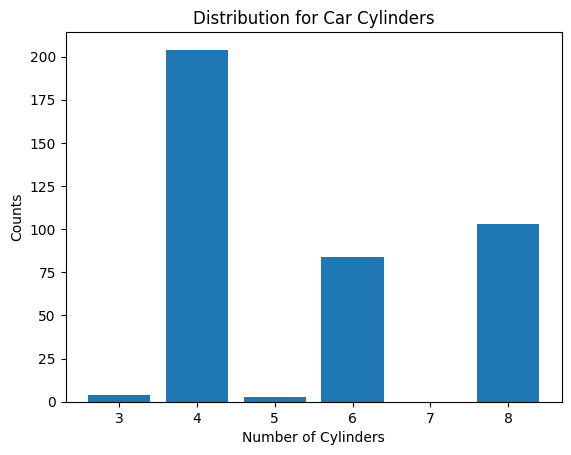

In [10]:
# Method 1: Plot the bar chart with matplotlib
plt.bar(cylinder_counts.index, cylinder_counts.values)

# Add labels and title
plt.title('Distribution for Car Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Counts')

# Show the plot
plt.show()

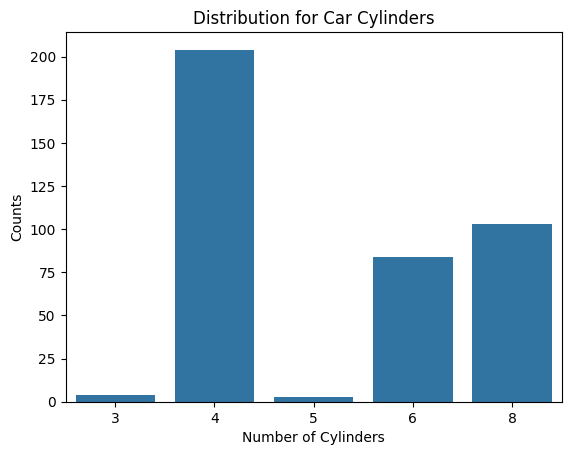

In [11]:
# Method 2: Use seaborn countplot for the bar chart.
sns.countplot(x = 'cylinders', data=auto)

# Add labels and title
plt.title('Distribution for Car Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Counts')

# Display Plot
plt.show()

#### Most cars in the dataset has 4 cylinders.

## Create a scatterplot that shows the relationship between horsepower and weight.

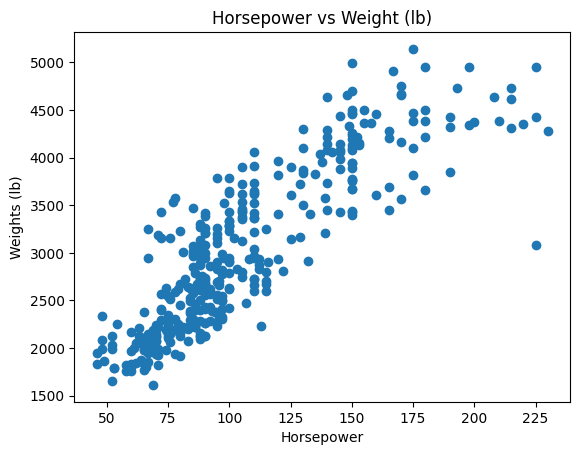

In [12]:
# Plot scatter for horsepower and weight
plt.scatter(auto['horsepower'], auto['weight'])

# Add labels and title
plt.title('Horsepower vs Weight (lb)')
plt.xlabel('Horsepower')
plt.ylabel('Weights (lb)')

plt.show()

The scatterplot shows that there's positive correlation between horsepower and weight of the automobile. 

The heavier cars has higher horsepower. However, this does not mean it has a causation relationship.

## Create a bar chart tha show the count of cars based on model year in different origin

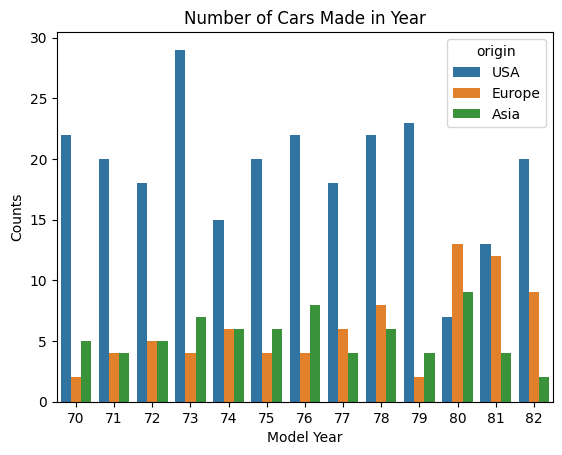

In [13]:
# Use seaborn countplot for the bar chart.
sns.countplot(x = 'model year', hue = 'origin', data=auto)

# Add labels and title
plt.title('Number of Cars Made in Year')
plt.xlabel('Model Year')
plt.ylabel('Counts')

# Display Plot
plt.show()

From the bar chart, we can see that in the earlier years, there are more cars made in USA. However, in year 80 and 81, more cars were made in other regions.